# UC A - Identification of mutations involved in the development of brain lower grade glioma

Documentation: 
- http://gmql.eu/popstudy/api/ui/#/default/server.api.variant_grouping
- http://gmql.eu/popstudy/api/ui/#/default/server.api.most_common_variants
- http://gmql.eu/popstudy/api/ui/#/default/server.api.annotate

Requirements to run this demo: https://github.com/DEIB-GECO/VarSum/blob/master/demo/README_requirements

Try this demo online: https://drive.google.com/file/d/1GDfBuDniDhCotHBJp7oU0Tr46ubLEMTX/view?usp=sharing

### Premise:
Usually tumor development is never associated to a single wrong nucleotide or short sequence, moreover our cells are capable to repair themselves when an error is found along the long sequence of 3 billion nucleotide pairs. However this sophisticated mechanism can fail if the mutations accumulate. Indeed, genetic pathologies are mostly caused by a combination of factors that usually involve many genes containing errors. Starting from this assumption, we can try to identify two mutations that are likely involved in development of brain lower grade glioma.

Useful functions

## Finding the first "target mutation"

Let's start this research by finding the somatic mutations that are more frequent in cancer patients.

In [2]:
import requests
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

def post_request(to: str, argument, print_status_code=True, print_warnings=True, timeout=None):
    resp = requests.post(to, json=argument, timeout=timeout)
    if print_status_code:
        print(' response status code: {}'.format(resp.status_code))
    res_body = resp.json()
    if resp.status_code != 200:
        print(res_body)
    if print_warnings:
        print('warnings ?: {}'.format(res_body.get('notice')))
    return res_body

In [3]:
most_common_mutations_req = {
    'having_meta': {
        'assembly': 'GRCh38',
        'healthy': False,
        'disease': 'brain lower grade glioma'
    },
    'having_variants': {
        'in_cell_type': ['somatic']
    }
}
most_common_mutations_resp = post_request('http://gmql.eu/popstudy/api/most_common_variants', most_common_mutations_req, print_status_code=False, print_warnings=False)

In [4]:
most_common_mutations_resp_df = pd.DataFrame.from_records(most_common_mutations_resp['rows'], columns=most_common_mutations_resp['columns'])
# Let's show also the "POSITIVE_RATIO", i.e. the % of positive donors in the population
most_common_mutations_resp_df['POSITIVE_RATIO'] = most_common_mutations_resp_df.apply(lambda r: r['POSITIVE_DONORS']/r['POPULATION_SIZE'], axis=1)
most_common_mutations_resp_df

,CHROM,START,REF,ALT,POPULATION_SIZE,POSITIVE_DONORS,OCCURRENCE_OF_VARIANT,FREQUENCY_OF_VARIANT,POSITIVE_RATIO
0,2,208248387,C,T,509,354,354,0.347741,0.695481
1,17,7673802,G,A,509,41,62,0.060904,0.080550
2,2,208248388,G,A,509,17,17,0.016699,0.033399
3,17,7674871,T,C,509,8,14,0.013752,0.015717
4,17,7673801,C,T,509,10,14,0.013752,0.019646
5,15,90088605,C,T,509,12,12,0.011788,0.023576
6,17,7675075,T,C,509,7,11,0.010806,0.013752
7,19,42287604,C,T,509,10,11,0.010806,0.019646
8,17,7675087,C,T,509,8,10,0.009823,0.015717
9,2,208248388,G,C,509,10,10,0.009823,0.019646


## "Target mutation 1" or TM1: 2:208248387-C-T (heterozygous)
### It appears only in heterozygous form in 69.5% of patients with brain lower grade glioma.

Such frequency has been calculated on the entire population of donors with this disease, but we can also look at the frequency in the subpopulations. Below, we compare the frequency of TM1 in different ethnicities and genders.
    # query

In [5]:
mut_1_req = {
    'having_meta': {
        'assembly': 'GRCh38',
        'healthy': False,
        'disease': 'brain lower grade glioma'
    },
    'having_variants': {
        'in_cell_type': ['somatic']
    },
    "target_variant": {"chrom":2, "start": 208248387, "ref":"C", "alt":"T"},
    "group_by": ["ethnicity", "gender"]
}
mut_1_req_resp = post_request('http://gmql.eu/popstudy/api/variant_grouping', mut_1_req, print_status_code=False, print_warnings=False)

    # import as DataFrame

In [6]:
mut_1_req_resp_df = pd.DataFrame.from_records(mut_1_req_resp['rows'], columns=mut_1_req_resp['columns'])
mut_1_req_resp_df.fillna(value='', inplace=True)    # replaces Nones (== any value) with ''
mut_1_req_resp_df['POSITIVE_RATIO'] = mut_1_req_resp_df.apply(lambda r: r['POSITIVE_DONORS']/r['POPULATION_SIZE'], axis=1)

df0 = mut_1_req_resp_df.pivot_table(mut_1_req_resp_df, ['ETHNICITY', 'GENDER'])

    # plot the ratio of patients with TM1 by ethnicity and gender

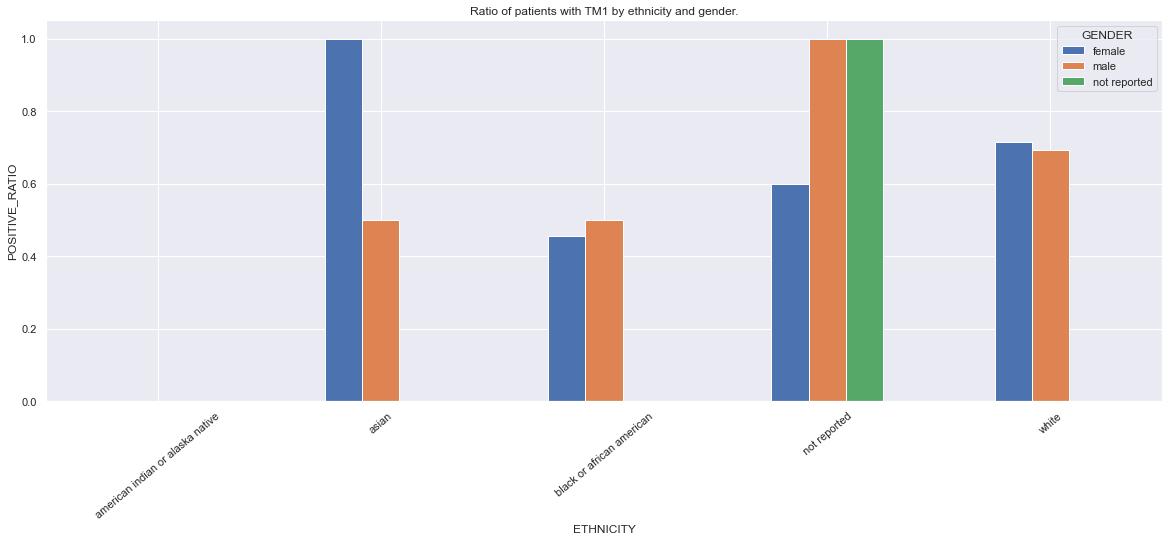

FREQUENCY  \
ETHNICITY                        GENDER                    
                                                0.347741   
                                 female         0.352423   
                                 male           0.343416   
                                 not reported   0.500000   
american indian or alaska native                0.000000   
                                 male           0.000000   
asian                                           0.375000   
                                 female         0.500000   
                                 male           0.250000   
black or african american                       0.238095   
                                 female         0.227273   
                                 male           0.250000   
not reported                                    0.409091   
                                 female         0.300000   
                                 male           0.500000   
                                 not reported   0.500000   
white                                           0.351496   
                                 female         0.357488   
                                 male           0.346743   

                                               OCCURRENCE_OF_TARGET_VARIANT  \
ETHNICITY                        GENDER                                       
                                                                        354   
                                 female                                 160   
                                 male                                   193   
                                 not reported                             1   
american indian or alaska native                                          0   
                                 male                                     0   
asian                                                                     6   
                                 female                                   4   
                                 male                                     2   
black or african american                                                10   
                                 female                                   5   
                                 male                                     5   
not reported                                                              9   
                                 female                                   3   
                                 male                                     5   
                                 not reported                             1   
white                                                                   329   
                                 female                                 148   
                                 male                                   181   

                                               POPULATION_SIZE  \
ETHNICITY                        GENDER                          
                                                           509   
                                 female                    227   
                                 male                      281   
                                 not reported                1   
american indian or alaska native                             1   
                                 male                        1   
asian                                                        8   
                                 female                      4   
                                 male                        4   
black or african american                                   21   
                                 female                     11   
                                 male                       10   
not reported                                                11   
                                 female                      5   
                                 male                        5   
    

In [7]:
df1 = mut_1_req_resp_df.drop(mut_1_req_resp_df.query('GENDER == "" | ETHNICITY == ""').index) # drop aggregated values
df1.drop(['OCCURRENCE_OF_TARGET_VARIANT', 'POPULATION_SIZE', 'POSITIVE_DONORS', 'FREQUENCY'], inplace=True, axis=1) # drop other columns
plot = pd.pivot_table(df1, index='ETHNICITY', columns='GENDER', values='POSITIVE_RATIO').plot(
    kind='bar',
    figsize=(20, 7),
    legend=True
)
for item in plot.get_xticklabels():
     item.set_rotation(40)
plt.title('Ratio of patients with TM1 by ethnicity and gender.')
plt.ylabel('POSITIVE_RATIO')
plt.show()
df0

## The observation of TM1 is independent on the ethnciity or gender value.

We observe that of all the patients affected by brain lower grade glioma (509), most of them are of white ethnicity (468). However, the population size in other ethnic groups is too small to make considerations about the locality of the genetic trait or the disease. Indeed, the lower number of cases in the other ethnic groups is probably connected to the fact that they are underrepresented in this study (white donors cover the ~75% of the patients analysed in TCGA - this can be confirmed by asking to the endpoint /donor_grouping the distribution of donors with somatic mutations by disease). Finally, the comparison of the frequency value in the overall population shows almost identical distribution of cases between males and females.

## Finding the "target mutation 2" or TM2 

To find the TM2, we can rely on the possibility to restrict the population of interest through metadata and region constraints, by imposing the presence of the TM1 in the patients with brain lower grade glioma.

In [8]:
target_mut_2_req = {
    'having_meta': {
        'assembly': 'GRCh38',
        'healthy': False,
        'disease': 'brain lower grade glioma'
    },
    'having_variants': {
        'in_cell_type': ['somatic'],
        "with": [{                  # impose presence of TM1 in patients
            "chrom":2, "start": 208248387, "ref":"C", "alt":"T"
        }]
    }
}
target_mut_2_resp = post_request('http://gmql.eu/popstudy/api/most_common_variants', target_mut_2_req, print_status_code=False, print_warnings=False)

In [9]:
target_mut_2_resp_df = pd.DataFrame.from_records(target_mut_2_resp['rows'], columns=target_mut_2_resp['columns'])
target_mut_2_resp_df['POSITIVE_RATIO'] = target_mut_2_resp_df.apply(lambda r: r['POSITIVE_DONORS']/r['POPULATION_SIZE'], axis=1)
target_mut_2_resp_df

,CHROM,START,REF,ALT,POPULATION_SIZE,POSITIVE_DONORS,OCCURRENCE_OF_VARIANT,FREQUENCY_OF_VARIANT,POSITIVE_RATIO
0,2,208248387,C,T,354,354,354,0.500000,1.000000
1,17,7673802,G,A,354,33,51,0.072034,0.093220
2,17,7673801,C,T,354,9,13,0.018362,0.025424
3,17,7674871,T,C,354,7,12,0.016949,0.019774
4,17,7675075,T,C,354,6,9,0.012712,0.016949
5,23,77654138,G,A,353,6,6,0.011696,0.016997
6,9,136518617,AGA,,354,8,8,0.011299,0.022599
7,17,7674219,C,T,354,7,8,0.011299,0.019774
8,19,42287604,C,T,354,8,8,0.011299,0.022599
9,24,5737916,C,T,353,1,2,0.010363,0.002833


## TM2: 17:7673802-G-A (mainly homozygous). Present in 10% of white patients with TM1 and brain lower grade glioma.

But what about the opposite direction, i.e. the frequency of TM1 in patients that have TM2? We can check it by querying the variant distribution of TM1 in patients where TM2 is present.

In [21]:
freq_distr_of_1_when_2_req = {
    'having_meta': {
        'assembly': 'GRCh38',
        'healthy': False,
        'disease': 'brain lower grade glioma'
    },
    'having_variants': {
        'in_cell_type': ['somatic'],
        "with": [{"chrom":17, "start": 7673802, "ref":"G", "alt":"A"}]
    },
    "target_variant": {"chrom":2, "start": 208248387, "ref":"C", "alt":"T"},
    "group_by": ["gender"]
}
freq_distr_of_1_when_2_res = post_request('http://gmql.eu/popstudy/api/variant_grouping', freq_distr_of_1_when_2_req, print_status_code=False, print_warnings=False)

In [22]:
freq_distr_of_1_when_2_res_df = pd.DataFrame.from_records(freq_distr_of_1_when_2_res['rows'], columns=freq_distr_of_1_when_2_res['columns'])
freq_distr_of_1_when_2_res_df.fillna(value='', inplace=True)    # replaces Nones (== any value) with ''

df20 = freq_distr_of_1_when_2_res_df.pivot_table(freq_distr_of_1_when_2_res_df, ['GENDER'])
df20['POSITIVE_RATIO'] = df20.apply(lambda r: r['POSITIVE_DONORS']/r['POPULATION_SIZE'], axis=1)
df20

,FREQUENCY,OCCURRENCE_OF_TARGET_VARIANT,POPULATION_SIZE,POSITIVE_DONORS,POSITIVE_RATIO
GENDER,,,,,
,0.402439,33,41,33,0.804878
female,0.431818,19,22,19,0.863636
male,0.368421,14,19,14,0.736842


### Interestingly, the observation of TM1 in a patient having TM2 and brain glioma is much more likely than the inverse. 
## Unidirectional linkage: ⁓80% of white patients with brain glioma and carrying TM2 also have TM1.

## Involved genes

In [12]:
annotate_req_template = {
    "assembly": "GRCh38",
    "chrom": "???",
    "start": "??",
    "ref": "??",
    "alt": "??"
}

annotate_req_template['chrom'] = 2
annotate_req_template['start'] = 208248387
annotate_req_template['ref'] = "C"
annotate_req_template['alt'] = "T"
gene_TM1 = post_request('http://gmql.eu/popstudy/api/annotate', annotate_req_template, print_status_code=False, print_warnings=False)

annotate_req_template['chrom'] = 17
annotate_req_template['start'] = 7673802
annotate_req_template['ref'] = "G"
annotate_req_template['alt'] = "A"
gene_TM2 = post_request('http://gmql.eu/popstudy/api/annotate', annotate_req_template, print_status_code=False, print_warnings=False)

In [13]:
genes = pd.DataFrame([gene_TM1['rows'][0], gene_TM2['rows'][0]], columns = ['CHROM', 'START', 'STOP', 'STRAND', 'GENE_SYMBOL', 'GENE_TYPE'], index=['TM1', 'TM2'])
genes

,CHROM,START,STOP,STRAND,GENE_SYMBOL,GENE_TYPE
TM1,2,208236226,208266074,-1,IDH1,protein_coding
TM2,17,7661778,7687550,-1,TP53,protein_coding


## Involved genes: IDH1 and TP53

Starting without any information, we identified a likely gene interaction, suggesting that development of brain lower grade glioma can result from the alteration of genetic conditions, between which the gene TP53 through the mutation 17:7661778-G-A and the gene IDH1 with the mutation 2:208236226-C-T.

## Are TM1 and TM2 valid genetic markers of brain lower grade glioma ?

    # distribution of patients having TM1 and TM2 by disease

In [14]:
disease_distr_req = {
    'having_meta': {
        'assembly': 'GRCh38',
        'healthy': False,
    },
    'having_variants': {
        'in_cell_type': ['somatic'],
        "with": [
            {"chrom":17, "start": 7673802, "ref":"G", "alt":"A"},
            {"chrom":2, "start": 208248387, "ref":"C", "alt":"T"}
        ]
    },
    "group_by": ["disease"]
}
disease_distr_res = post_request('http://gmql.eu/popstudy/api/donor_grouping', disease_distr_req, print_status_code=False, print_warnings=False)

In [15]:
disease_distr_res_df = pd.DataFrame.from_records(disease_distr_res['rows'], columns=['DISEASE', 'TM1_TM2_DONORS'])
disease_distr_res_df = disease_distr_res_df.pivot_table(disease_distr_res_df, ['DISEASE'])

    # distribution of patients having TM1, but not TM2, by disease

In [16]:
disease_distr_req['having_variants']['with'] = [{"chrom":2, "start": 208248387, "ref":"C", "alt":"T"}]
disease_distr_req['having_variants']['without'] = [{"chrom":17, "start": 7673802, "ref":"G", "alt":"A"}]
disease_distr_res = post_request('http://gmql.eu/popstudy/api/donor_grouping', disease_distr_req, print_status_code=False, print_warnings=False)

In [17]:
disease_distr_res_TM1_df = pd.DataFrame.from_records(disease_distr_res['rows'], columns=['DISEASE', 'TM1_DONORS'])
disease_distr_res_TM1_df = disease_distr_res_TM1_df.pivot_table(disease_distr_res_TM1_df, ['DISEASE'])

    # distribution of patients having TM2, but not TM1, by disease

In [18]:
disease_distr_req['having_variants']['without'] = [{"chrom":2, "start": 208248387, "ref":"C", "alt":"T"}]
disease_distr_req['having_variants']['with'] = [{"chrom":17, "start": 7673802, "ref":"G", "alt":"A"}]
disease_distr_res = post_request('http://gmql.eu/popstudy/api/donor_grouping', disease_distr_req, print_status_code=False, print_warnings=False)

In [19]:
disease_distr_res_TM2_df = pd.DataFrame.from_records(disease_distr_res['rows'], columns=['DISEASE', 'TM2_DONORS'])
disease_distr_res_TM2_df = disease_distr_res_TM2_df.pivot_table(disease_distr_res_TM2_df, ['DISEASE'])

    # plot comparison

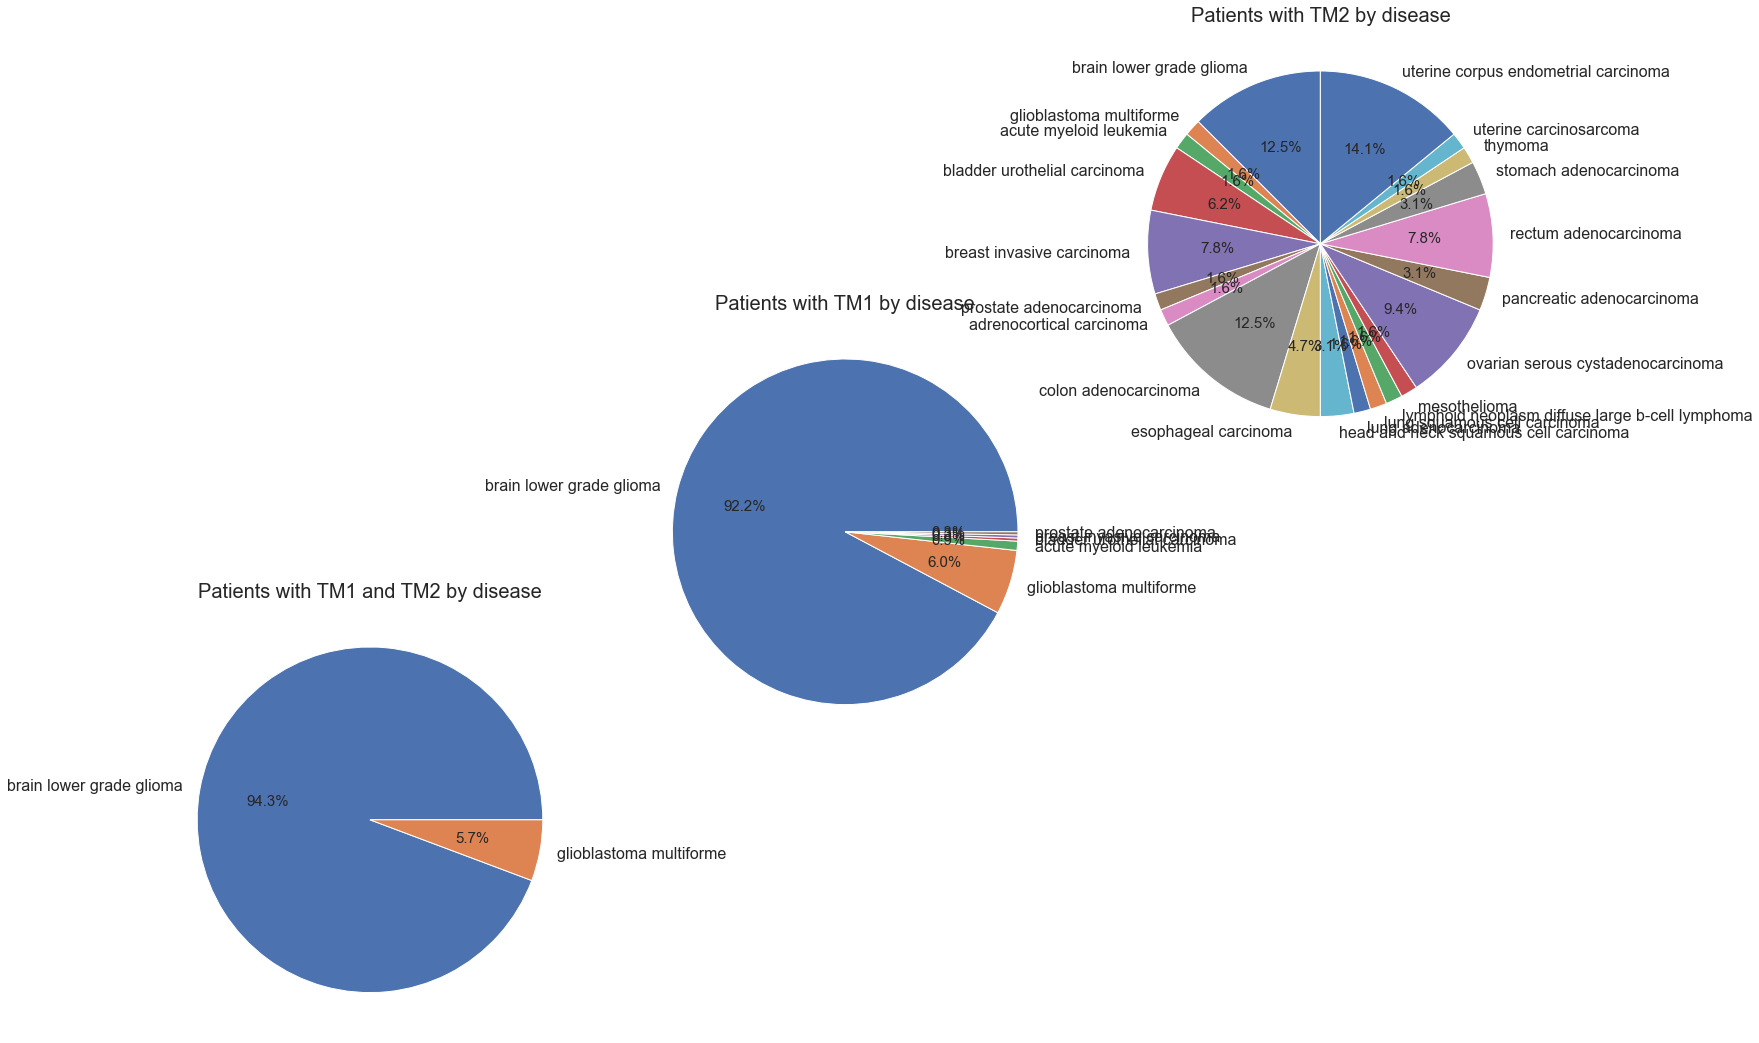

In [20]:
# put all countings side by side in single DataFrame (makes the plot use the same colors in all subplots)
df_concat = pd.concat([disease_distr_res_df, disease_distr_res_TM1_df, disease_distr_res_TM2_df], axis=1, copy=True)

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_axes([0, .15, .3, .9], aspect=1)
ax2 = fig.add_axes([.33, .35, .3, .9], aspect=1)
ax3 = fig.add_axes([.66, .55, .3, .9], aspect=1)
plt.rcParams['font.size'] = 15
plt.rc('xtick',labelsize=16)

# Donors of TM1 and TM2 (bottom left)
df_concat.drop(['TM2_DONORS', 'TM1_DONORS'], axis=1).dropna().plot(
    ax=ax1,
    kind='pie',
    y='TM1_TM2_DONORS',
    labels=df_concat.index.tolist(), 
    autopct='%1.1f%%',
    legend=None,
    title='Patients with TM1 and TM2 by disease'
)
# Donors of TM1 (middle)
df_concat.drop(['TM1_TM2_DONORS', 'TM2_DONORS'], axis=1).dropna().plot(
    ax=ax2,
    kind='pie',
    y='TM1_DONORS',
    labels=df_concat.index.tolist(), 
    autopct='%1.1f%%',
    legend=None,
    title='Patients with TM1 by disease'
)
# Donors of TM2 (top right)
df_concat.drop(['TM1_TM2_DONORS', 'TM1_DONORS'], axis=1).dropna().plot(
    ax=ax3,
    kind='pie',
    y='TM2_DONORS',
    labels=df_concat.index.tolist(), 
    autopct='%1.1f%%',
    title='Patients with TM2 by disease',
    legend=None,
    startangle=90
)
ax1.set(xlabel='', ylabel='')
ax1.title.set_size(20)
ax2.set(xlabel='', ylabel='')
ax2.title.set_size(20)
ax3.set(xlabel='', ylabel='')
ax3.title.set_size(20)

plt.show()

The presence of both TM1 and TM2 are good genetic markers for the diagnosis of brain lower grade glioma as their combination reduces the number and types of associated pathologies to only 2 (both brain tumors, of which glioblastoma multiforme is the more aggressive counterpart of lower grade glioma) and increases of 1.1% the likelihood of correctly detecting brain lower grade glioma. This observation is confirmed by a study (reference at the end) published in Neuro-Oncology, which states: "The data indicate that IDH1 mutation combined with either TP53 mutation or total 1p/19q loss is a frequent and early change in the majority of oligodendroglial tumors, diffuse astrocytomas, anaplastic astrocytomas, and secondary glioblastomas  \[...]".

References:
- Ichimura, K., Pearson, D. M., Kocialkowski, S., Bäcklund, L. M., Chan, R., Jones, D. T., & Collins, V. P. (2009). IDH1 mutations are present in the majority of common adult gliomas but rare in primary glioblastomas. Neuro-oncology, 11(4), 341–347. https://doi.org/10.1215/15228517-2009-025